# Volatility-Forecasting-in-India
Starter notebook for the Volatility-Forecasting-in-India project.

In [29]:
# =========================
# Volatility Data Loader & Explorer
# =========================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

# -------------------------
# Setup paths
# -------------------------
DATA_PATH = "../data/raw"
OUTPUT_PATH = "../outputs"
os.makedirs(DATA_PATH, exist_ok=True)
os.makedirs(OUTPUT_PATH, exist_ok=True)

data_file = os.path.join(DATA_PATH, "volatility_data.xlsx")

print("Checking for volatility data...")

Checking for volatility data...


In [30]:
# -------------------------
# Load data if exists, else create mock data
# -------------------------
if os.path.exists(data_file):
    df = pd.read_excel(data_file, engine='openpyxl')
    print("✅ Data loaded successfully from Excel!")
else:
    print(f"⚠ File not found at {data_file}. Generating mock data...")

    # Generate 60 business days of mock stock prices
    np.random.seed(42)  # for reproducibility
    dates = pd.date_range(start="2025-01-01", periods=60, freq="B")

    price = 100  # start price
    close_prices = []
    for _ in range(len(dates)):
        daily_return = np.random.normal(0, 0.01)  # small daily return
        price *= (1 + daily_return)
        close_prices.append(round(price, 2))

        df = pd.DataFrame({
        "date": dates,
        "open": [p * np.random.uniform(0.99, 1.01) for p in close_prices],
        "high": [p * np.random.uniform(1.0, 1.02) for p in close_prices],
        "low": [p * np.random.uniform(0.98, 1.0) for p in close_prices],
        "close": close_prices,
        "volume": np.random.randint(1000, 5000, size=len(dates))
    })

    df.to_excel(data_file, index=False)
    print(f"✅ Mock data generated and saved to {data_file}")

✅ Data loaded successfully from Excel!


In [31]:
# -------------------------
# Explore the data
# -------------------------
print("\n--- Data Info ---")
print(df.info())

print("\n--- Missing Values ---")
print(df.isnull().sum())

print("\n--- First 5 Rows ---")
display(df.head())


--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    60 non-null     datetime64[ns]
 1   open    60 non-null     float64       
 2   high    60 non-null     float64       
 3   low     60 non-null     float64       
 4   close   60 non-null     float64       
 5   volume  60 non-null     int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 2.9 KB
None

--- Missing Values ---
date      0
open      0
high      0
low       0
close     0
volume    0
dtype: int64

--- First 5 Rows ---


,date,open,high,low,close,volume
0,2025-01-01,100.160105,101.499469,98.814874,100.50,4009
1,2025-01-02,99.483974,100.963923,100.156378,100.36,4710
2,2025-01-03,100.628146,101.585435,100.214908,101.01,1154
3,2025-01-06,102.191451,102.625655,100.517863,102.55,3537
4,2025-01-07,102.779820,103.557291,100.471431,102.31,2409


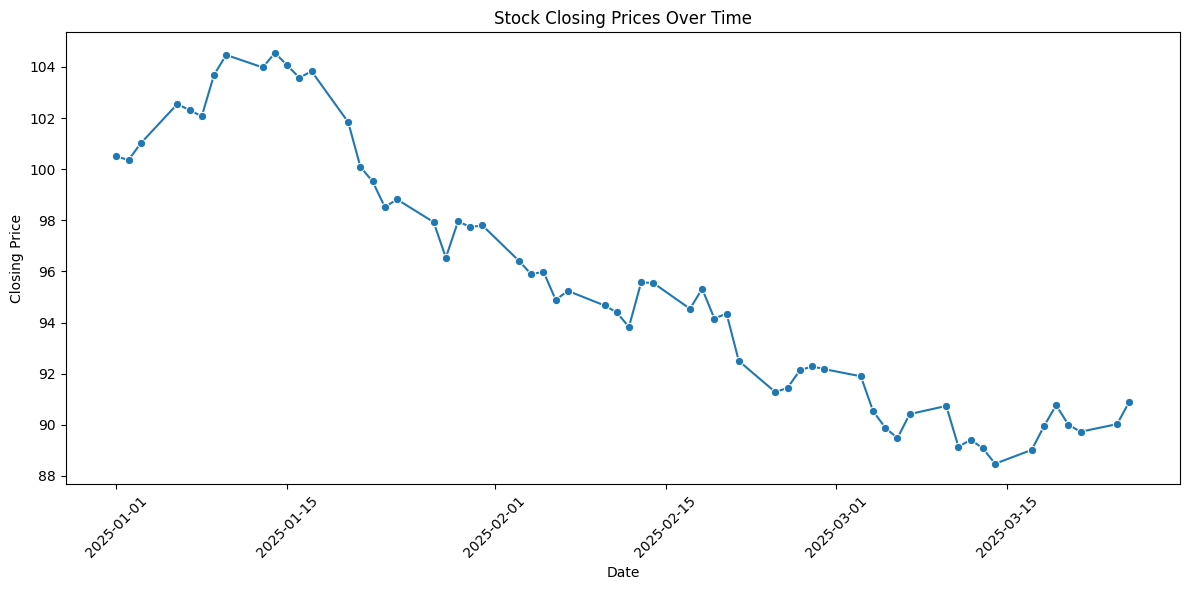

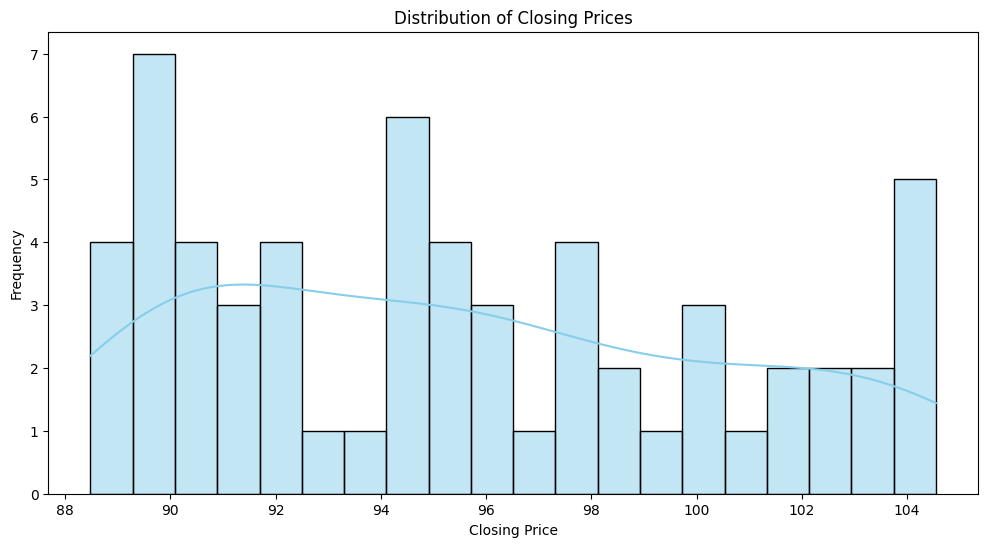

In [32]:
# -------------------------
# Quick visualization
# -------------------------
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x="date", y="close", marker="o")
plt.title("Stock Closing Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,6))
sns.histplot(df['close'], bins=20, kde=True, color='skyblue')
plt.title("Distribution of Closing Prices")
plt.xlabel("Closing Price")
plt.ylabel("Frequency")
plt.show()

In [33]:
# -------------------------
# Quick summary statistics
# -------------------------
print("\n--- Summary Statistics ---")
display(df.describe())

# -------------------------
# Optional: calculate daily returns
# -------------------------
df['return'] = df['close'].pct_change() * 100
print("\n--- First 5 Daily Returns ---")
display(df[['date','return']].head())




--- Summary Statistics ---


,date,open,high,low,close,volume
count,60,60.000000,60.000000,60.000000,60.000000,60.000000
mean,2025-02-11 07:12:00,95.584646,96.521433,94.683630,95.597500,2996.233333
min,2025-01-01 00:00:00,88.597642,89.079947,87.010334,88.480000,1019.000000
25%,2025-01-21 18:00:00,91.132886,91.841374,90.328215,90.875000,1903.250000
50%,2025-02-11 12:00:00,95.166558,96.060267,94.148354,95.065000,2944.000000
75%,2025-03-04 06:00:00,99.402827,100.981924,98.758407,99.662500,3964.750000
max,2025-03-25 00:00:00,104.995895,105.876802,103.905753,104.550000,4896.000000
std,NaN,5.006990,4.961088,4.820557,4.983655,1190.446909



--- First 5 Daily Returns ---


,date,return
0,2025-01-01,NaN
1,2025-01-02,-0.139303
2,2025-01-03,0.647668
3,2025-01-06,1.524602
4,2025-01-07,-0.234032


In [34]:
# Info and missing values
print("Data Information:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    60 non-null     datetime64[ns]
 1   open    60 non-null     float64       
 2   high    60 non-null     float64       
 3   low     60 non-null     float64       
 4   close   60 non-null     float64       
 5   volume  60 non-null     int64         
 6   return  59 non-null     float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 3.4 KB
None

Missing Values:
date      0
open      0
high      0
low       0
close     0
volume    0
return    1
dtype: int64


In [35]:
# Summary statistics
print("\nSummary Statistics:")
display(df.describe())


Summary Statistics:


,date,open,high,low,close,volume,return
count,60,60.000000,60.000000,60.000000,60.000000,60.000000,59.000000
mean,2025-02-11 07:12:00,95.584646,96.521433,94.683630,95.597500,2996.233333,-0.165746
min,2025-01-01 00:00:00,88.597642,89.079947,87.010334,88.480000,1019.000000,-1.960784
25%,2025-01-21 18:00:00,91.132886,91.841374,90.328215,90.875000,1903.250000,-0.695733
50%,2025-02-11 12:00:00,95.166558,96.060267,94.148354,95.065000,2944.000000,-0.234032
75%,2025-03-04 06:00:00,99.402827,100.981924,98.758407,99.662500,3964.750000,0.361376
max,2025-03-25 00:00:00,104.995895,105.876802,103.905753,104.550000,4896.000000,1.854418
std,NaN,5.006990,4.961088,4.820557,4.983655,1190.446909,0.911390


In [36]:
# Calculate daily returns
df['return'] = df['close'].pct_change() * 100
print("\nFirst 5 Daily Returns:")
display(df[['date', 'return']].head())

# Rolling volatility (5-day window)
df['rolling_volatility'] = df['return'].rolling(window=5).std()



First 5 Daily Returns:


,date,return
0,2025-01-01,NaN
1,2025-01-02,-0.139303
2,2025-01-03,0.647668
3,2025-01-06,1.524602
4,2025-01-07,-0.234032


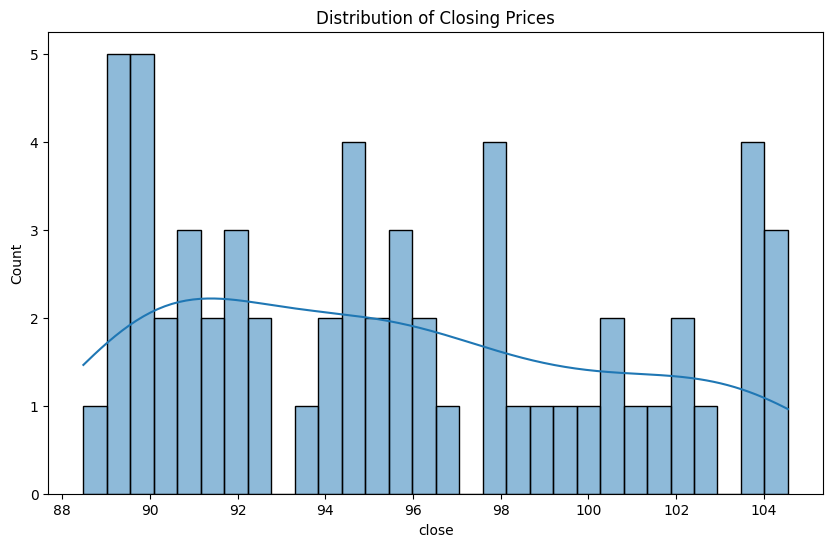

In [37]:
# Plot distribution of closing prices
plt.figure(figsize=(10,6))
sns.histplot(df['close'], bins=30, kde=True)
plt.title("Distribution of Closing Prices")
plt.show()


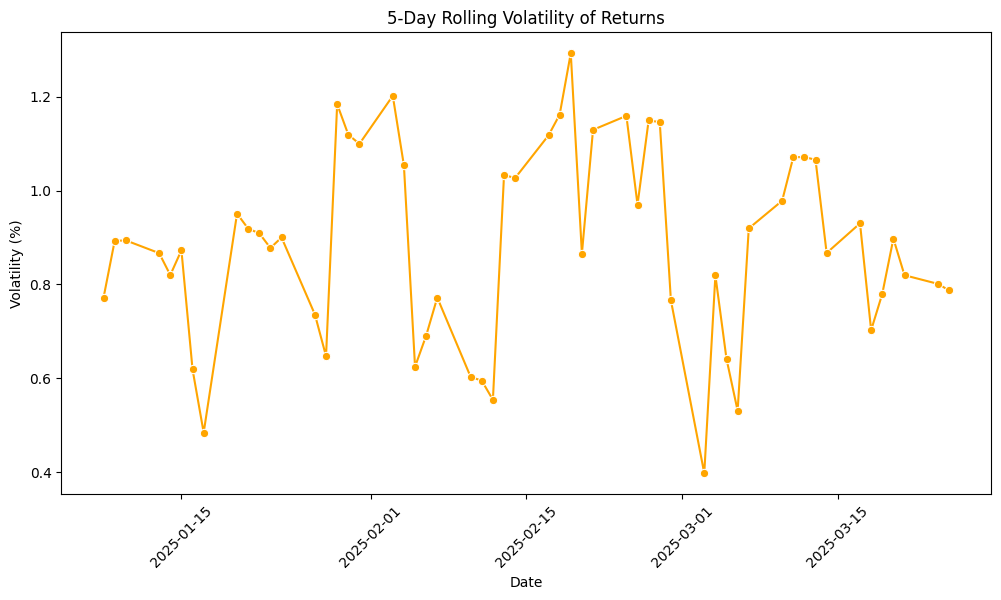

In [38]:
# Plot rolling volatility
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='date', y='rolling_volatility', marker='o', color='orange')
plt.title("5-Day Rolling Volatility of Returns")
plt.xlabel("Date")
plt.ylabel("Volatility (%)")
plt.xticks(rotation=45)
plt.show()


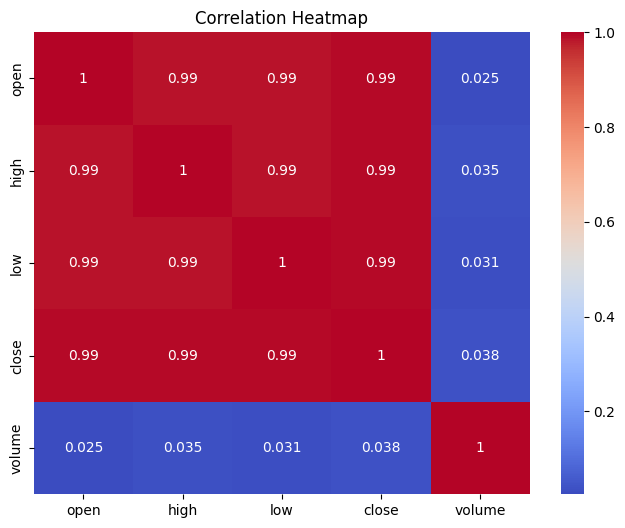

In [39]:

# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df[['open','high','low','close','volume']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()